Infant Health Prediction | EDA
-> Load the dataset

-> Perform Univariate and Multivariate analysis and draw conclusions from there.

-> Explore Correlation Matrix

-> Check the distribution(skewness) of the columns

-> Detect Outliers(don't remove)

-> Detect Class Label Imbalance

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[15,6]

In [4]:
df = pd.read_csv("Infant_Health_Prediction_data.csv")
df.head()

,Unnamed: 0,BirthAsphyxia,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHreport,LowerBodyO2,RUQO2,...,XrayReport,Disease,GruntingReport,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick
0,0,no,Equal,Severe,Normal,Normal,yes,no,5-12,<5,...,Asy/Patchy,TGA,no,4-10_days,no,Lt_to_Rt,Transp.,Normal,Normal,no
1,1,no,Equal,Moderate,High,Grd_Glass,no,no,<5,5-12,...,Grd_Glass,Fallot,no,0-3_days,no,Rt_to_Lt,Mild,Abnormal,High,no
2,2,no,Equal,Severe,Normal,Plethoric,no,yes,5-12,5-12,...,Normal,PFC,no,0-3_days,no,Lt_to_Rt,Complete,Normal,High,no
3,3,no,Equal,Moderate,Normal,Plethoric,no,no,5-12,<5,...,Plethoric,PAIVS,no,0-3_days,no,NaN,Complete,Normal,Low,no
4,4,no,Equal,Moderate,Normal,Plethoric,no,yes,12+,5-12,...,Plethoric,PAIVS,no,0-3_days,yes,Lt_to_Rt,Complete,Normal,Normal,yes


In [5]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,BirthAsphyxia,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHreport,LowerBodyO2,RUQO2,CO2Report,XrayReport,Disease,GruntingReport,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick
0,no,Equal,Severe,Normal,Normal,yes,no,5-12,<5,<7.5,Asy/Patchy,TGA,no,4-10_days,no,Lt_to_Rt,Transp.,Normal,Normal,no
1,no,Equal,Moderate,High,Grd_Glass,no,no,<5,5-12,>=7.5,Grd_Glass,Fallot,no,0-3_days,no,Rt_to_Lt,Mild,Abnormal,High,no
2,no,Equal,Severe,Normal,Plethoric,no,yes,5-12,5-12,>=7.5,Normal,PFC,no,0-3_days,no,Lt_to_Rt,Complete,Normal,High,no
3,no,Equal,Moderate,Normal,Plethoric,no,no,5-12,<5,<7.5,Plethoric,PAIVS,no,0-3_days,no,NaN,Complete,Normal,Low,no
4,no,Equal,Moderate,Normal,Plethoric,no,yes,12+,5-12,<7.5,Plethoric,PAIVS,no,0-3_days,yes,Lt_to_Rt,Complete,Normal,Normal,yes


In [6]:
df.shape

(15000, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BirthAsphyxia   15000 non-null  object
 1   HypDistrib      15000 non-null  object
 2   HypoxiaInO2     15000 non-null  object
 3   CO2             15000 non-null  object
 4   ChestXray       15000 non-null  object
 5   Grunting        15000 non-null  object
 6   LVHreport       15000 non-null  object
 7   LowerBodyO2     15000 non-null  object
 8   RUQO2           15000 non-null  object
 9   CO2Report       15000 non-null  object
 10  XrayReport      15000 non-null  object
 11  Disease         15000 non-null  object
 12  GruntingReport  15000 non-null  object
 13  Age             15000 non-null  object
 14  LVH             15000 non-null  object
 15  DuctFlow        9311 non-null   object
 16  CardiacMixing   14273 non-null  object
 17  LungParench     15000 non-null  object
 18  LungFl

Observing the Above datasets we can say it contain Object data Type

In [8]:
df.nunique()

BirthAsphyxia     2
HypDistrib        2
HypoxiaInO2       3
CO2               3
ChestXray         5
Grunting          2
LVHreport         2
LowerBodyO2       3
RUQO2             3
CO2Report         2
XrayReport        5
Disease           6
GruntingReport    2
Age               3
LVH               2
DuctFlow          2
CardiacMixing     3
LungParench       3
LungFlow          3
Sick              2
dtype: int64

The above nunique function tells us the number of unique values for data column

In [9]:
(df.isnull().sum()/df.shape[0])*100

BirthAsphyxia      0.000000
HypDistrib         0.000000
HypoxiaInO2        0.000000
CO2                0.000000
ChestXray          0.000000
Grunting           0.000000
LVHreport          0.000000
LowerBodyO2        0.000000
RUQO2              0.000000
CO2Report          0.000000
XrayReport         0.000000
Disease            0.000000
GruntingReport     0.000000
Age                0.000000
LVH                0.000000
DuctFlow          37.926667
CardiacMixing      4.846667
LungParench        0.000000
LungFlow           0.000000
Sick               0.000000
dtype: float64

**The Above Formula calculates the percentage of Missing Values / NULL values for each data column**

In [10]:
len(df.columns)

20

It Identifies the column length of this dataset

Calculate the Memory Usage Differences

In [11]:
print("Pandas Memory Usage:", df.memory_usage().sum(), 'Bytes')

Pandas Memory Usage: 2400132 Bytes


In [12]:
print("Pandas Deep Memory Usage:", df.memory_usage(deep=True).sum(), 'Bytes')

Pandas Deep Memory Usage: 18324646 Bytes


POLARS

In [13]:
import polars as pl

df1 = pl.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\GSSOC\infant health prediction issue\infant health prediction issue dataset~\Infant_Health_Prediction_data.csv")

print("Polars Memory Usage:", df1.estimated_size('kb') , 'KB')

del df1

Polars Memory Usage: 1494.705078125 KB


**memory usage for dataset**

<font size="4">Pandas Memory Usage: 1506456 Bytes</font>

Pandas Deep Memory Usage: 11153925 Bytes





**polars**

Polars Memory Usage: 1494.705078125 KB

In [14]:
# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='ignore')


In [15]:

custom_percentiles = [0.1, 0.25, 0.5, 0.75, 0.99]
description = df.describe(percentiles=custom_percentiles, include='all')
description


,BirthAsphyxia,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHreport,LowerBodyO2,RUQO2,CO2Report,XrayReport,Disease,GruntingReport,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick
count,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,9311,14273,15000,15000,15000
unique,2,2,3,3,5,2,2,3,3,2,5,6,2,3,2,2,3,3,3,2
top,no,Equal,Moderate,Normal,Oligaemic,no,no,5-12,5-12,<7.5,Normal,Fallot,no,0-3_days,no,Lt_to_Rt,Complete,Normal,Low,no
freq,14602,14591,7831,12210,4497,13179,12013,7085,7254,12581,4925,5936,12613,10767,12173,8209,8442,12178,7283,11434


__As there is no Numerics therefore its not possible to Find Mean Median Mode and likes__

<Font size = "5">**Metabolic Syndrome Prediction | 2. EDA**</Font>

-> Perform Univariate and Multivariate analysis and draw conclusions from there.

-> Explore Correlation Matrix(can try different methods and search if they give the same conclusion and why)

-> Check the distribution(skewness) of the columns

-> Detect Outliers(don't remove)

-> Detect Class Label Imbalance

**1. Perform Univariate and Multivariate analysis and draw conclusions from there.**

<Axes: xlabel='BirthAsphyxia', ylabel='Count'>

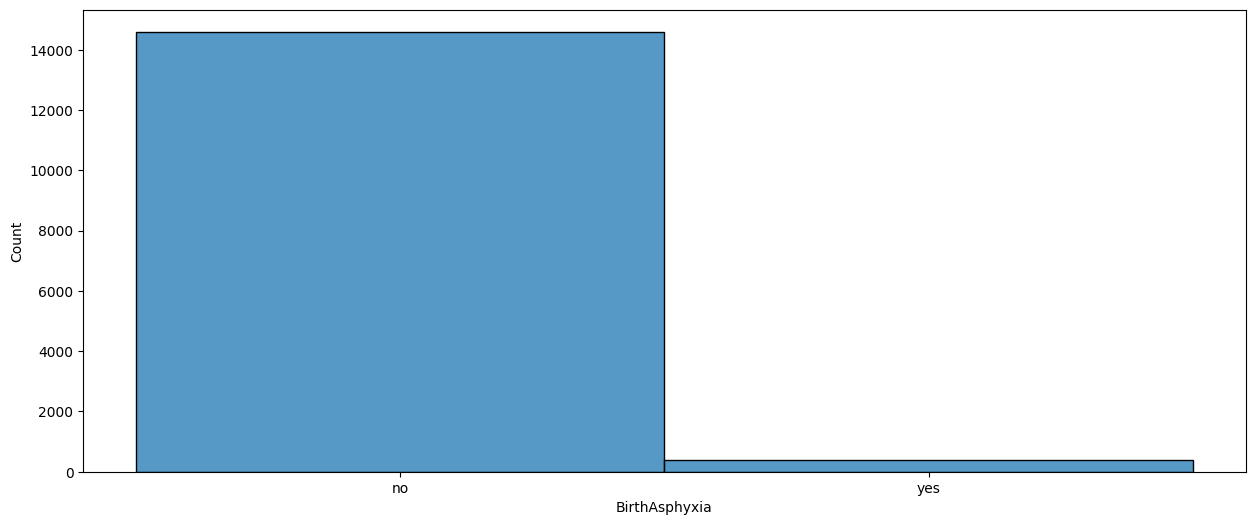

In [16]:
sns.histplot(df['BirthAsphyxia'])

Birth asphyxia affects fewer than 2000 children, while over 14,000 newborns do not experience it.

<Axes: xlabel='CardiacMixing', ylabel='Count'>

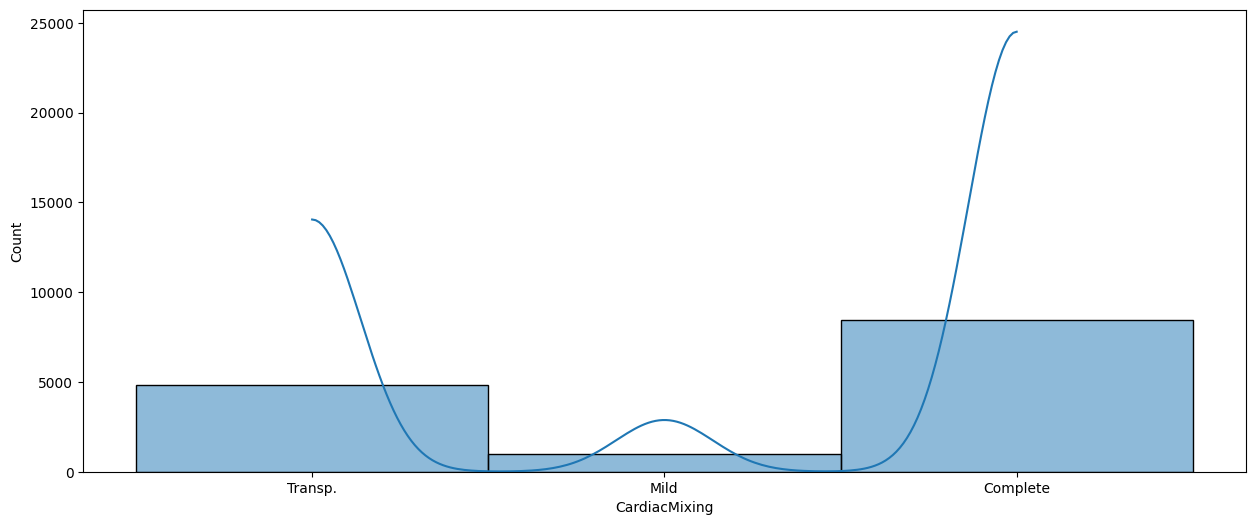

In [17]:
sns.histplot(df['CardiacMixing'] , kde = True)

Among these cases, fewer than 5000 involve transportation. Approximately 1000 fall into the category of mid-level Cardiac Mixing, while over 8000 are considered complete.

<Axes: xlabel='CO2Report', ylabel='Count'>

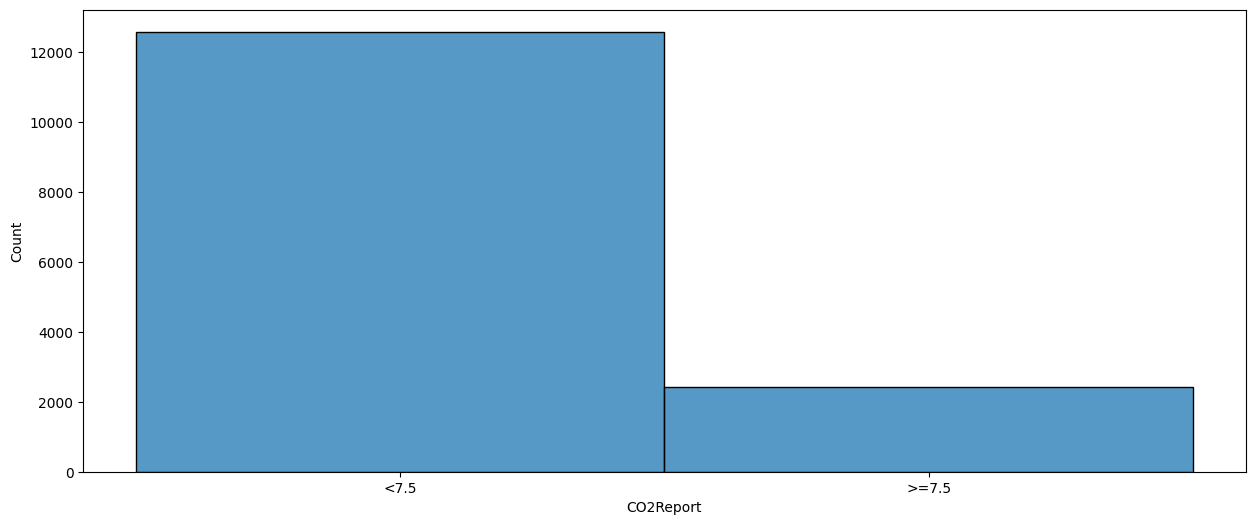

In [18]:
sns.histplot(df['CO2Report'])

The CO2 report graph indicates that over 12,000 cases show values less than
7.5
while less than 4,000 cases exhibit values equal to or greater than 7.5 posing higher level of CO2

<Axes: xlabel='Age', ylabel='Count'>

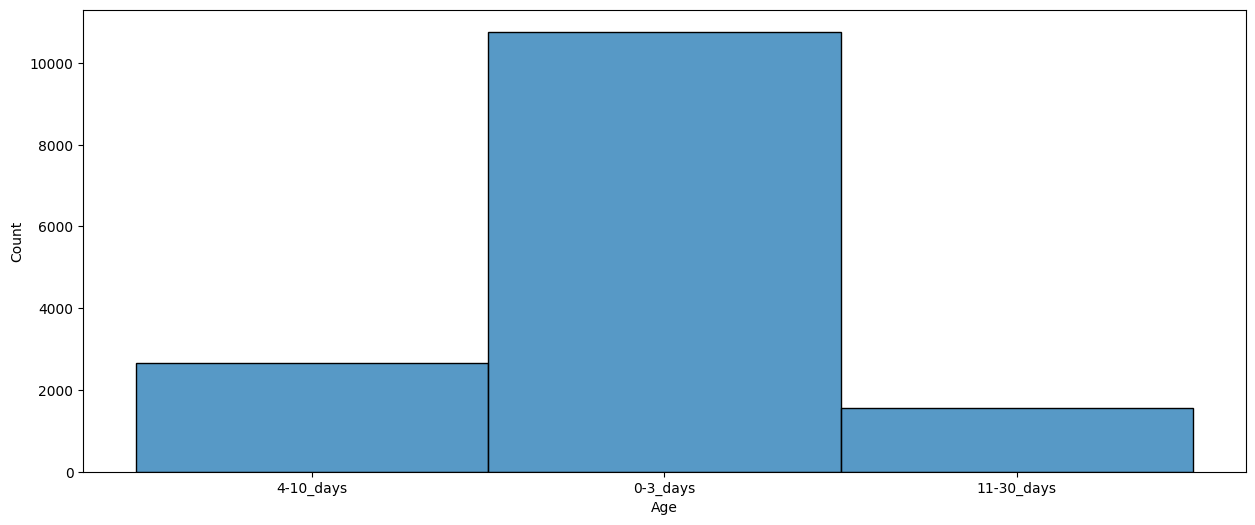

In [19]:
sns.histplot(df['Age'])

More than 10,000 babies are aged 0-3 days, while over 2,000 fall within the range of 4-10 days. Less than 2,000 babies are aged 11-30 days.

<Axes: xlabel='CO2', ylabel='Count'>

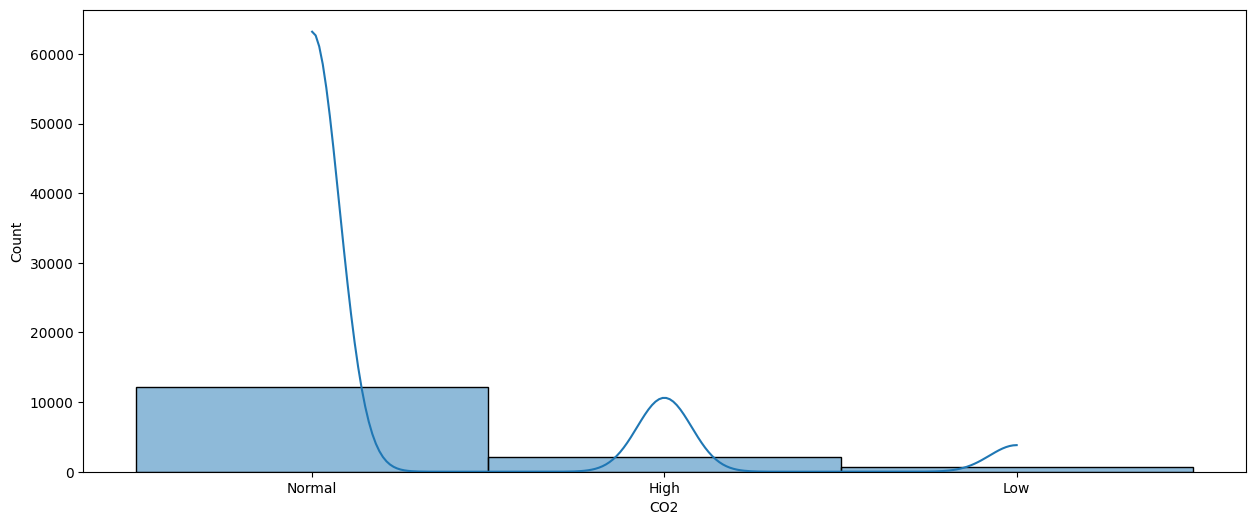

In [20]:
sns.histplot(df['CO2'] , kde = True)

The CO2 graph indicates that over 12,000 cases exhibit normal levels, while more than 2,000 cases show high levels, and less than 2,000 cases demonstrate low levels.

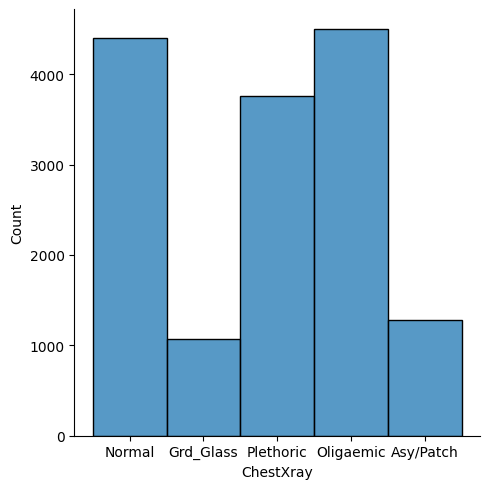

In [21]:
sns.displot(df['ChestXray'])

The Chest X-ray graph illustrates that more than 4,000 cases are classified as normal, while less than 4,000 cases are categorized as plethoric. Additionally, there are at least 1,000 cases graded as Grd_Glass, more than 4,000 cases identified as Oligaemic, and over 1,000 cases described as Asy/Patch.

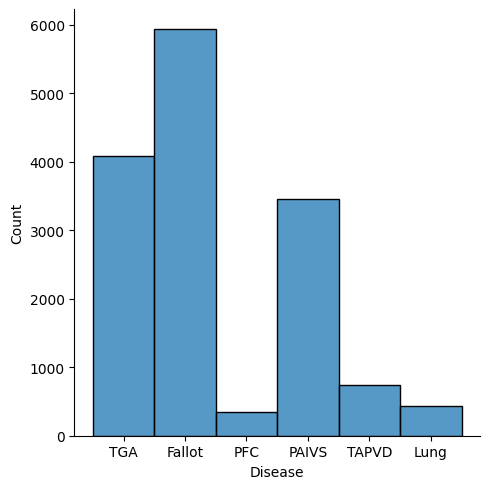

In [22]:
sns.displot(df['Disease'] )

The Disease graph illustrates that there are over 4,000 cases of TGA, Lesser than 4000 of PAIVS,  while less than or equal to 6,000 cases are classified as Fallot. Additionally, there are fewer than 1,000 cases each of PFC, TAPVD, and LUNG.

<Axes: ylabel='DuctFlow'>

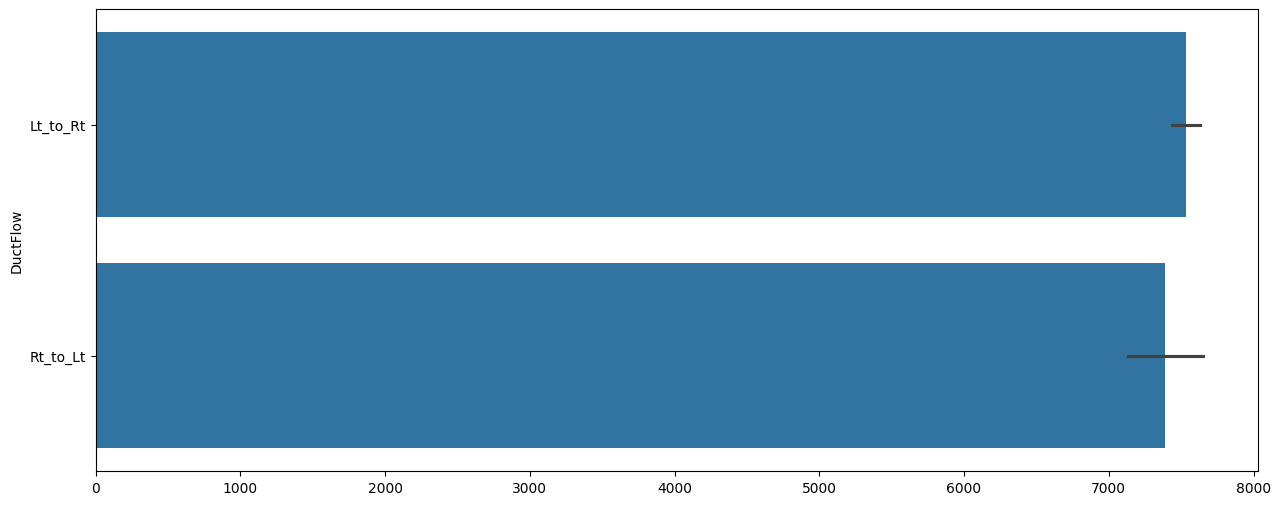

In [23]:
sns.barplot(df['DuctFlow'])

The Ductflow graph indicates that between 7,000 and 8,000 cases exhibit either left-to-right or right-to-left flow. Notably, left-to-right flow appears to have a higher probability within this range.

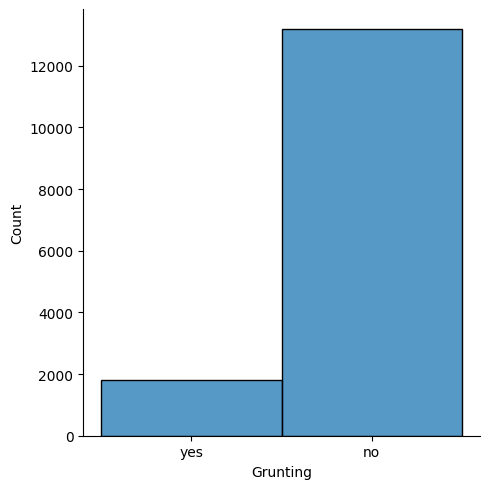

In [24]:
sns.displot(df['Grunting'])

 fewer than 2,000 cases indicate Grunting while over 12,000 cases indicate does not

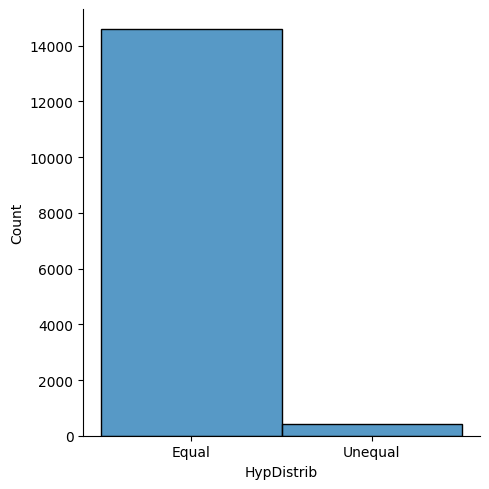

In [25]:
sns.displot(df['HypDistrib'])


For "HypDistribution," more than 14,000 cases show equality, while less than 2,000 cases show inequality in infants.

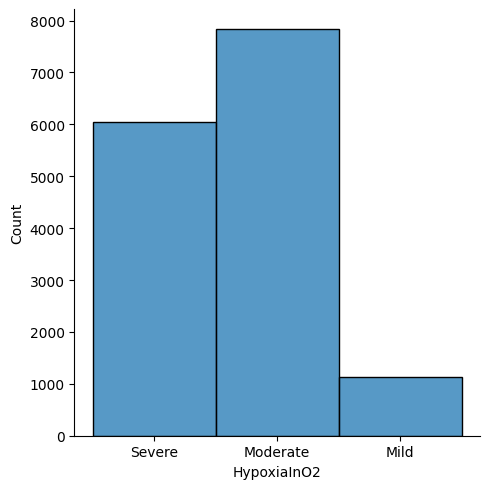

In [26]:
sns.displot(df['HypoxiaInO2'])

fewer than 6,200 cases are categorized as severe, while fewer than 8,000 cases are categorized as moderate, and fewer than 2,000 cases are categorized as mild in case of Hypoxialn02

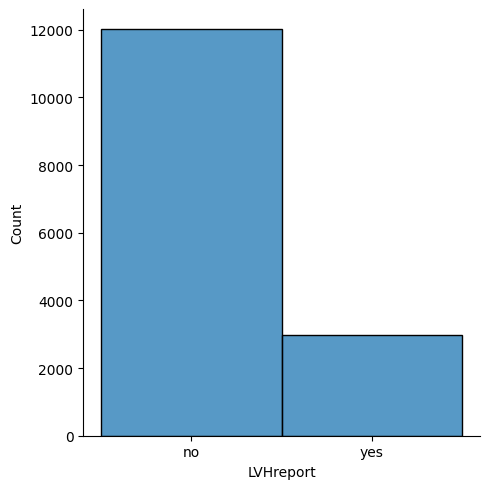

In [27]:
sns.displot(df['LVHreport'])

In the LVHreport data, there are less than 4,000 cases indicating "yes," while there are at least 12,000 cases indicating "no." i.e they have no sympton of LVH

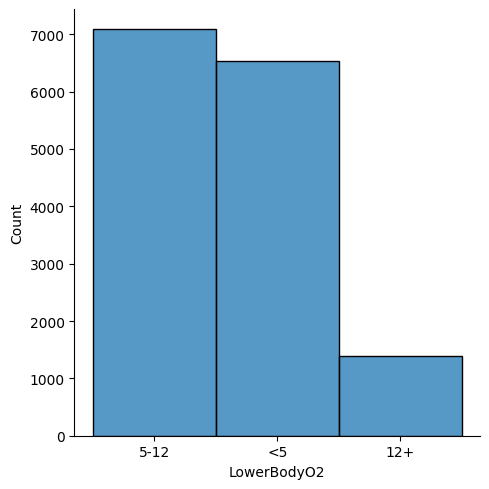

In [28]:
sns.displot(df['LowerBodyO2'])

In LowerBodyO2 data, over 7,000 cases have levels between 5 and 12, while less than 7,000 cases have levels below 5. Additionally, fewer than 2,000 cases have levels of 12 or higher.

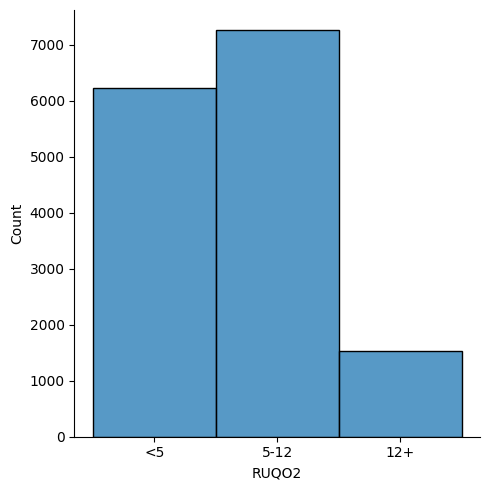

In [29]:
sns.displot(df['RUQO2'] )

In the RUQ02 dataset:
- Less than 6,500 cases have levels below 5.
- More than 7,000 cases have levels between 5 and 12.
- Less than 2,000 cases have levels of 12 or higher.

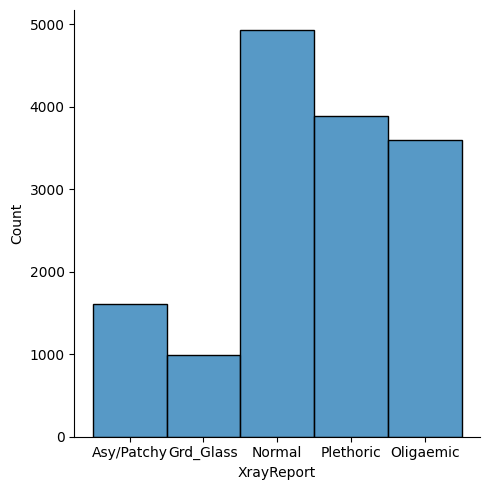

In [30]:
sns.displot(df['XrayReport'])

In the Xray Report data:
- Less than 2,000 cases are classified as Asy/Patchy.
- Less than or equal to 1,000 cases are categorized as Grd_Glass.
- Less than 5,000 cases are labeled as Normal.
- Less than 4,000 cases are identified as Plethoric.
- Less than 4,000 cases are characterized as Oligaemic.

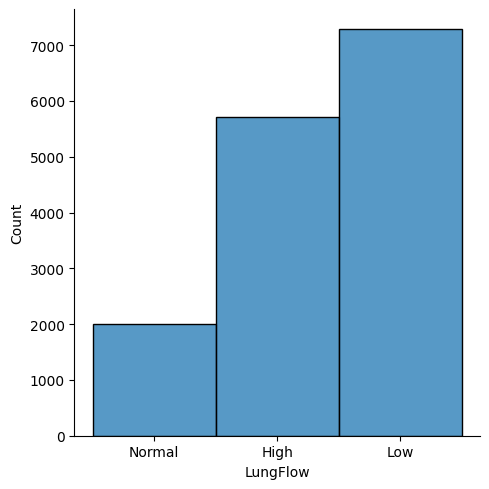

In [31]:
sns.displot(df['LungFlow'])

For LungFlow cases:
- Less than or equal to 2,000 cases have normal flow.
- Less than 6,000 cases have high flow.
- More than 7,000 cases have low flow.

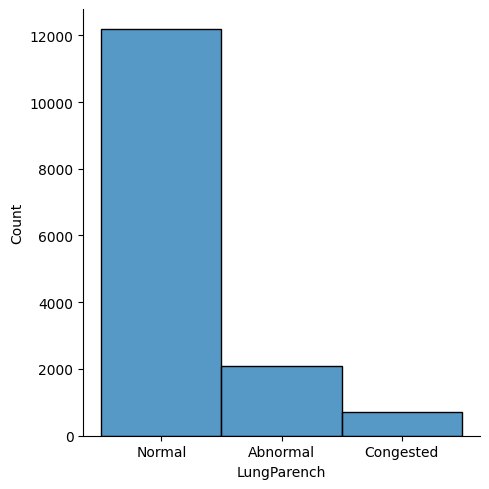

In [32]:
sns.displot(df['LungParench'])

For Lung Parench:
- More than 12,000 cases are classified as Normal.
- More than 2,000 cases are labeled as Abnormal.
- Less than 2,000 cases are categorized as Congested.

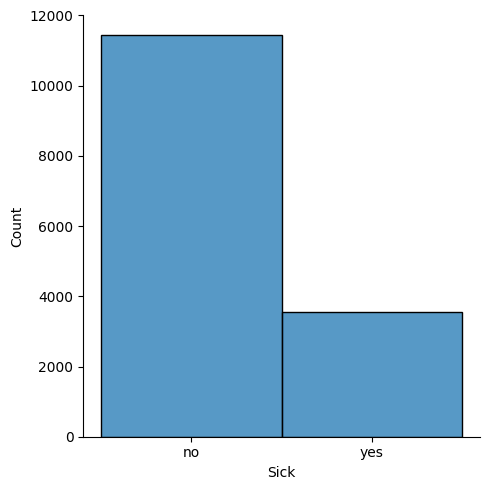

In [33]:
sns.displot(df['Sick'])

- Less than 12,000 cases are not sick.
- Less than 4,000 cases are sick.

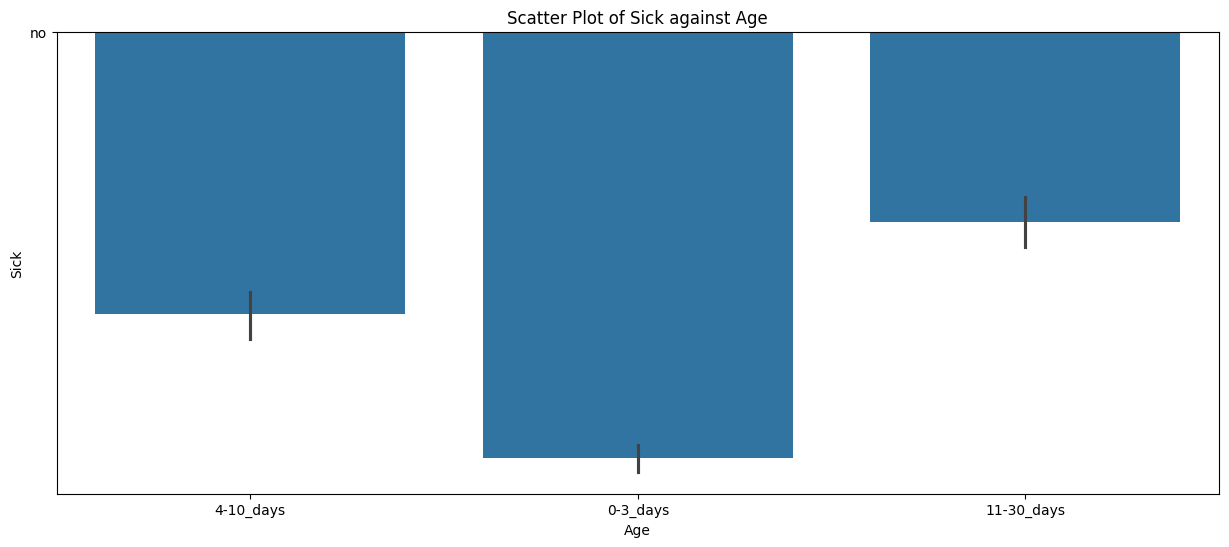

In [34]:
# Scatter plot of Age vs. Sick
sns.barplot(x='Age', y='Sick', data=df)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Sick')
plt.title('Scatter Plot of Sick against Age')

# Show plot
plt.show()

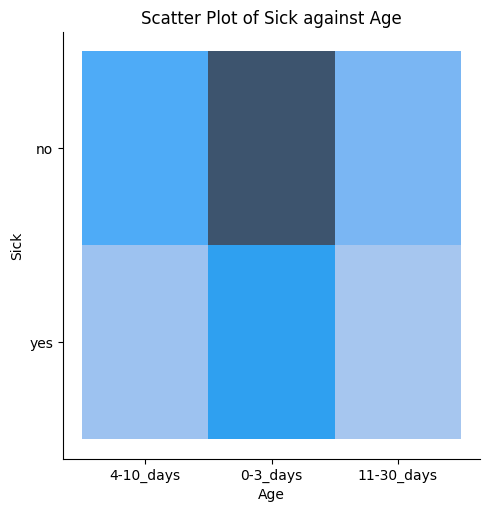

In [35]:
# Scatter plot of Age vs. Sick
sns.displot(x='Age', y='Sick', data=df)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Sick')
plt.title('Scatter Plot of Sick against Age')

# Show plot
plt.show()

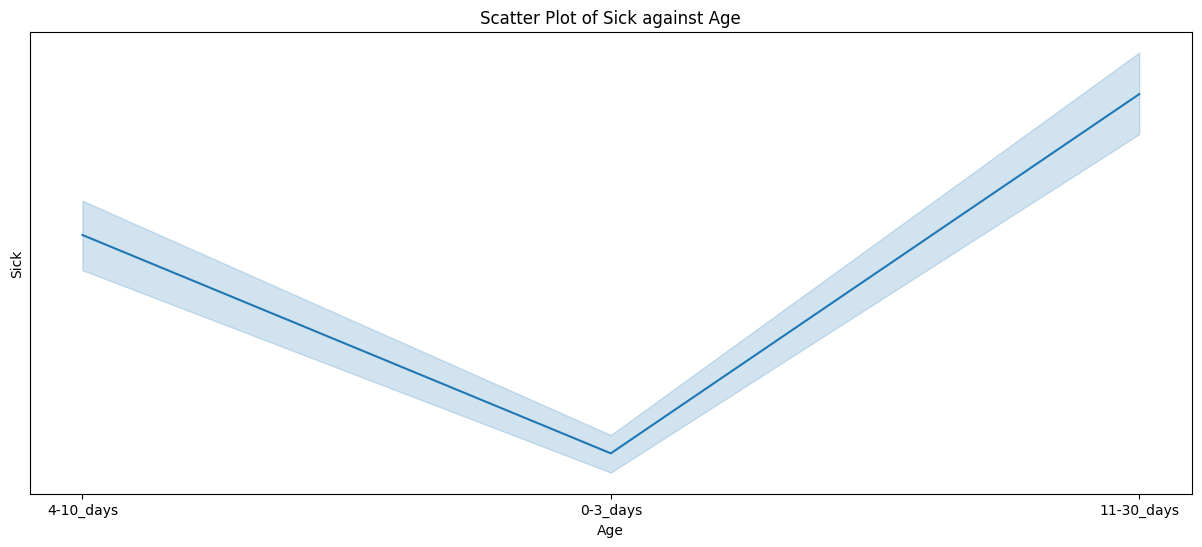

In [36]:
# Scatter plot of Age vs. Sick
sns.lineplot(x='Age', y='Sick', data=df)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Sick')
plt.title('Scatter Plot of Sick against Age')

# Show plot
plt.show()

From These Graph we can observe that 0-3 days Born Infant are most likely to get sick and as the age increase they get cured and are unlikely to get sick

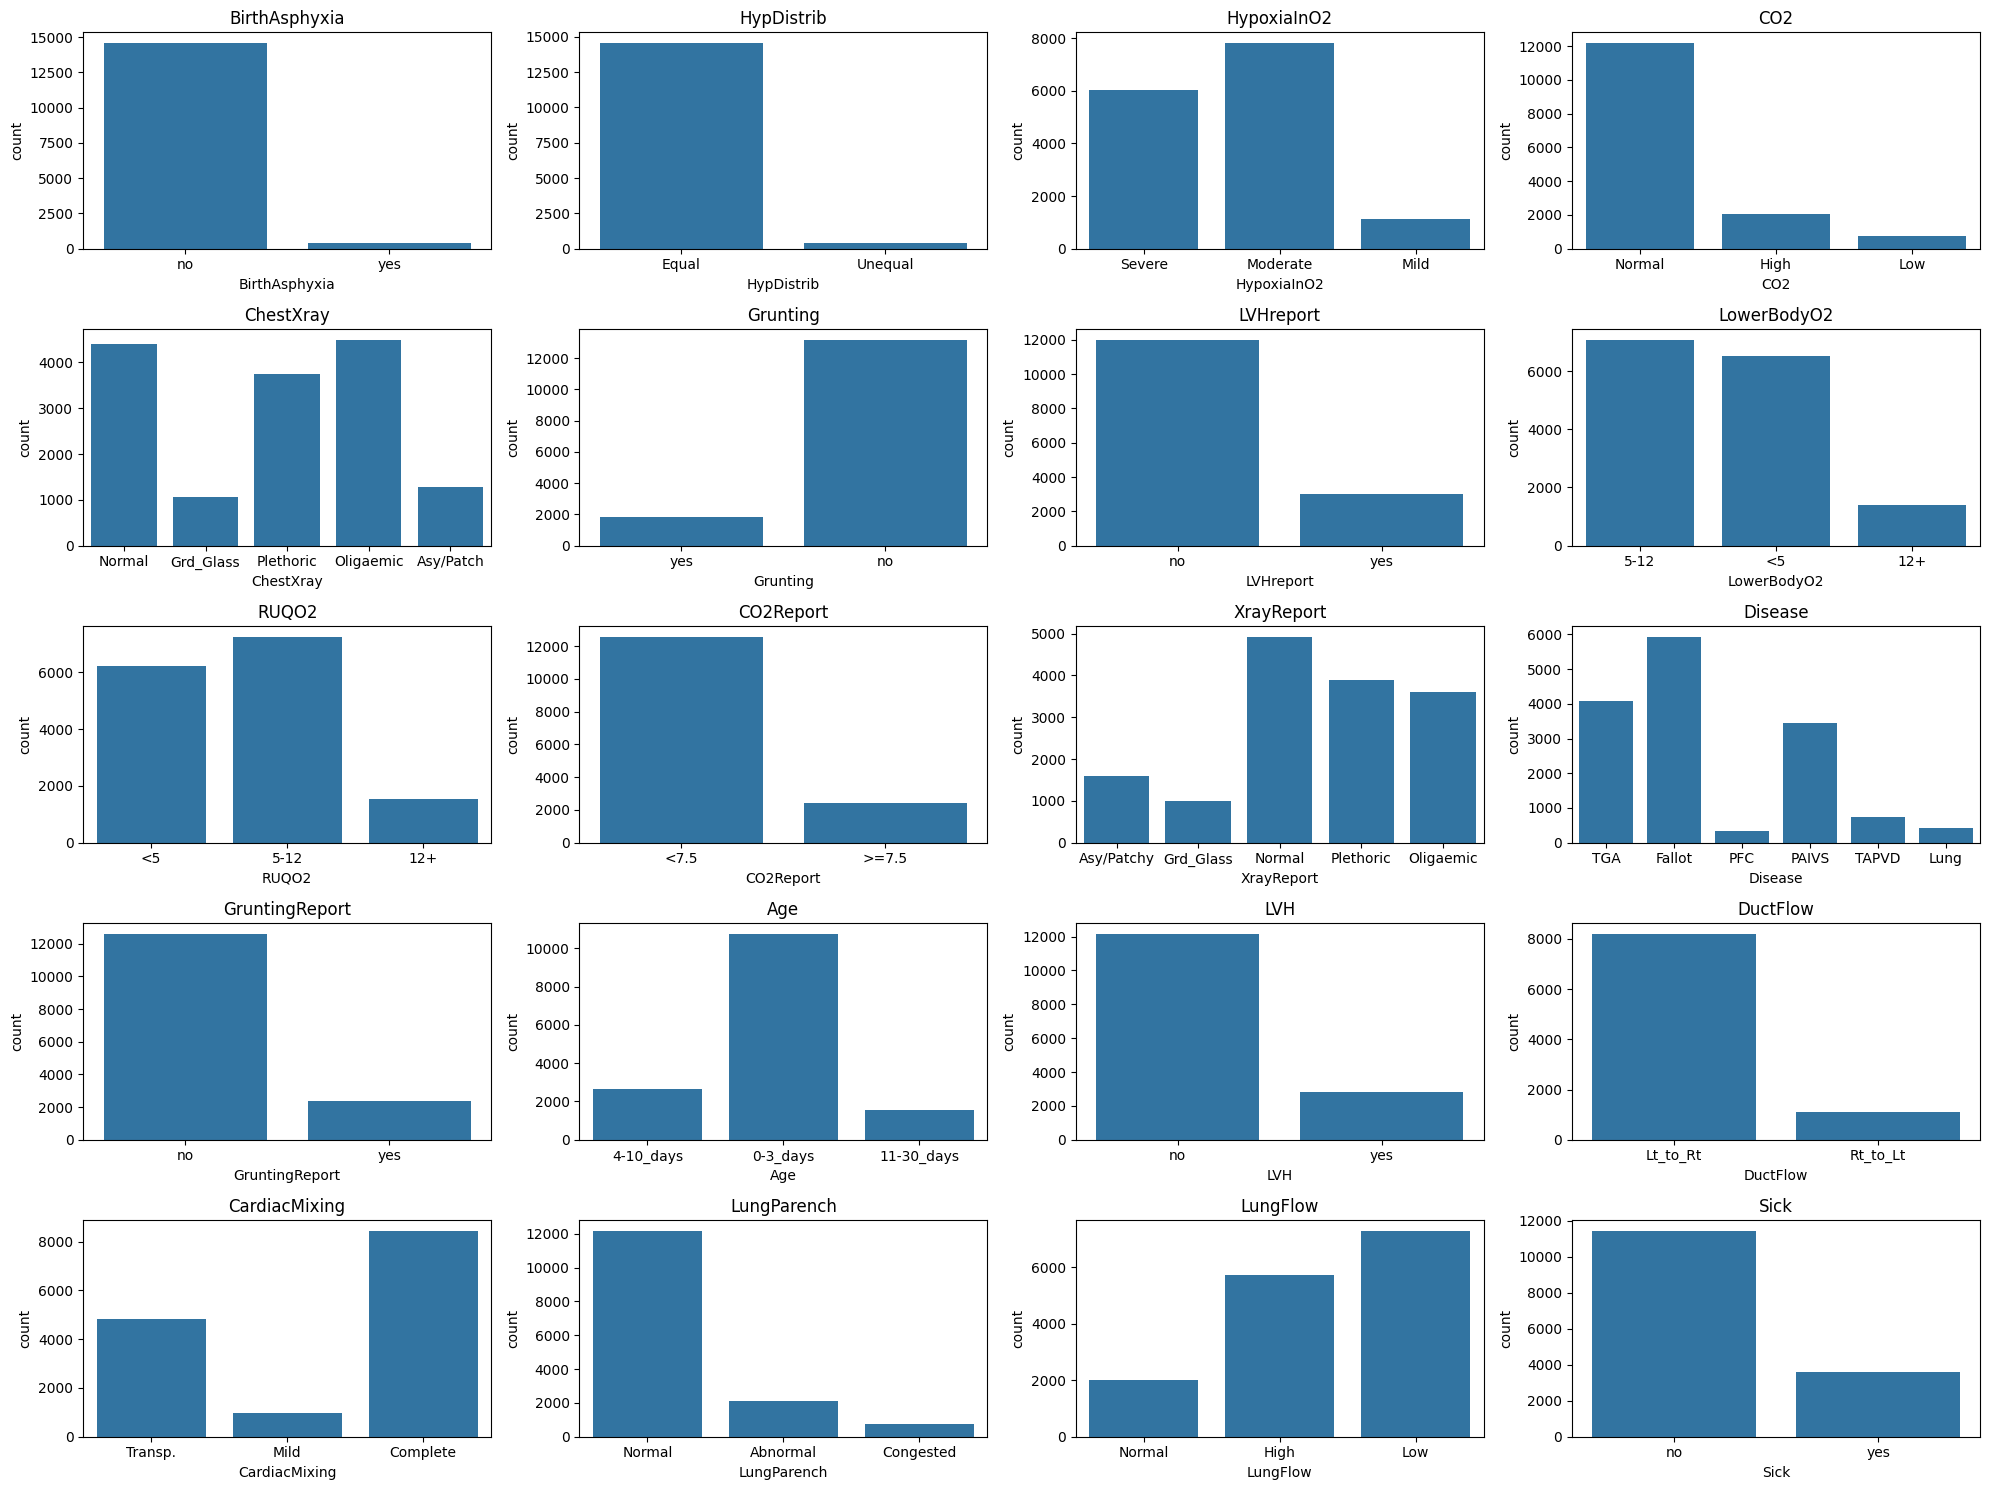

In [37]:
# Set the number of rows and columns for the subplot grid
r = 5
c = 4

# Create a larger plot
fig, axes = plt.subplots(r, c, figsize=(20, 15))

# Initialize iterator
it = 0

# Iterate over each column in the DataFrame
for i, ax in zip(df.columns, axes.flatten()):
    sns.countplot(x=df[i], ax=ax)
    ax.set_title(i)  # Set title for each subplot
    it += 1

# Adjust layout and show plot
plt.tight_layout()
plt.show()

<Font size  = '6'> Data Imputation and Data Encoding </Font>

In [38]:
import scipy.stats as stats

In [39]:
pvalue = []
for i in df.drop('Sick',axis=1).columns:
    stat,pval,dof,exp = stats.chi2_contingency(pd.crosstab(df[i],df['Sick']))
    pvalue.append(pval)

In [40]:
sig = pd.DataFrame(pvalue,index=df.drop('Sick',axis=1).columns,columns=['P-Value'])
sig.head()

,P-Value
BirthAsphyxia,8.222743e-01
HypDistrib,2.265954e-01
HypoxiaInO2,9.960833e-01
CO2,3.717060e-02
ChestXray,6.149512e-17


In [41]:
sig[sig['P-Value']<0.05].index

Index(['CO2', 'ChestXray', 'Grunting', 'CO2Report', 'XrayReport', 'Disease',
       'GruntingReport', 'Age', 'DuctFlow', 'CardiacMixing', 'LungParench',
       'LungFlow'],
      dtype='object')

In [42]:
x = df[['ChestXray', 'Grunting', 'XrayReport', 'Disease', 'GruntingReport','Age', 'DuctFlow', 'CardiacMixing', 'LungParench', 'LungFlow']]
y = df['Sick']


In [43]:
x.head()

,ChestXray,Grunting,XrayReport,Disease,GruntingReport,Age,DuctFlow,CardiacMixing,LungParench,LungFlow
0,Normal,yes,Asy/Patchy,TGA,no,4-10_days,Lt_to_Rt,Transp.,Normal,Normal
1,Grd_Glass,no,Grd_Glass,Fallot,no,0-3_days,Rt_to_Lt,Mild,Abnormal,High
2,Plethoric,no,Normal,PFC,no,0-3_days,Lt_to_Rt,Complete,Normal,High
3,Plethoric,no,Plethoric,PAIVS,no,0-3_days,NaN,Complete,Normal,Low
4,Plethoric,no,Plethoric,PAIVS,no,0-3_days,Lt_to_Rt,Complete,Normal,Normal


**Replacing the Strings with Numerical Value For Machine Learning Models**

In [44]:
for i in ['Grunting','GruntingReport']:
    x[i] = x[i].replace({'yes':1,'no':0})

In [45]:
for i in x.drop(['Grunting','GruntingReport'],axis=1).columns:
    print("The unique values in {} are :{}".format(i,x[i].unique()))

The unique values in ChestXray are :['Normal' 'Grd_Glass' 'Plethoric' 'Oligaemic' 'Asy/Patch']
The unique values in XrayReport are :['Asy/Patchy' 'Grd_Glass' 'Normal' 'Plethoric' 'Oligaemic']
The unique values in Disease are :['TGA' 'Fallot' 'PFC' 'PAIVS' 'TAPVD' 'Lung']
The unique values in Age are :['4-10_days' '0-3_days' '11-30_days']
The unique values in DuctFlow are :['Lt_to_Rt' 'Rt_to_Lt' nan]
The unique values in CardiacMixing are :['Transp.' 'Mild' 'Complete' nan]
The unique values in LungParench are :['Normal' 'Abnormal' 'Congested']
The unique values in LungFlow are :['Normal' 'High' 'Low']


In [46]:
for i in x.drop(['Grunting','GruntingReport'],axis=1).columns:
    print("The value counts of {} are :\n{}".format(i,x[i].value_counts()))
    print("--"*50)

The value counts of ChestXray are :
ChestXray
Oligaemic    4497
Normal       4401
Plethoric    3757
Asy/Patch    1278
Grd_Glass    1067
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
The value counts of XrayReport are :
XrayReport
Normal        4925
Plethoric     3886
Oligaemic     3598
Asy/Patchy    1604
Grd_Glass      987
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
The value counts of Disease are :
Disease
Fallot    5936
TGA       4083
PAIVS     3457
TAPVD      741
Lung       434
PFC        349
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
The value counts of Age are :
Age
0-3_days      10767
4-10_days      2669
11-30_days     1564
Name: count, dtype: int64
----------------------------------------------------------------------------------------

In [47]:
x = pd.get_dummies(x,columns=['DuctFlow','CardiacMixing','LungParench'],drop_first=True)
x.head()

,ChestXray,Grunting,XrayReport,Disease,GruntingReport,Age,LungFlow,DuctFlow_Rt_to_Lt,CardiacMixing_Mild,CardiacMixing_Transp.,LungParench_Congested,LungParench_Normal
0,Normal,1,Asy/Patchy,TGA,0,4-10_days,Normal,False,False,True,False,True
1,Grd_Glass,0,Grd_Glass,Fallot,0,0-3_days,High,True,True,False,False,False
2,Plethoric,0,Normal,PFC,0,0-3_days,High,False,False,False,False,True
3,Plethoric,0,Plethoric,PAIVS,0,0-3_days,Low,False,False,False,False,True
4,Plethoric,0,Plethoric,PAIVS,0,0-3_days,Normal,False,False,False,False,True


In [48]:
x['Age'] = x['Age'].replace({'0-3_days':0,'4-10_days':1,'11-30_days':2})
x.head()

,ChestXray,Grunting,XrayReport,Disease,GruntingReport,Age,LungFlow,DuctFlow_Rt_to_Lt,CardiacMixing_Mild,CardiacMixing_Transp.,LungParench_Congested,LungParench_Normal
0,Normal,1,Asy/Patchy,TGA,0,1,Normal,False,False,True,False,True
1,Grd_Glass,0,Grd_Glass,Fallot,0,0,High,True,True,False,False,False
2,Plethoric,0,Normal,PFC,0,0,High,False,False,False,False,True
3,Plethoric,0,Plethoric,PAIVS,0,0,Low,False,False,False,False,True
4,Plethoric,0,Plethoric,PAIVS,0,0,Normal,False,False,False,False,True


In [49]:
x['LungFlow'] = x['LungFlow'].replace({'Normal':0,'Low':1,'High':2})
x.head()

,ChestXray,Grunting,XrayReport,Disease,GruntingReport,Age,LungFlow,DuctFlow_Rt_to_Lt,CardiacMixing_Mild,CardiacMixing_Transp.,LungParench_Congested,LungParench_Normal
0,Normal,1,Asy/Patchy,TGA,0,1,0,False,False,True,False,True
1,Grd_Glass,0,Grd_Glass,Fallot,0,0,2,True,True,False,False,False
2,Plethoric,0,Normal,PFC,0,0,2,False,False,False,False,True
3,Plethoric,0,Plethoric,PAIVS,0,0,1,False,False,False,False,True
4,Plethoric,0,Plethoric,PAIVS,0,0,0,False,False,False,False,True


In [50]:
for i in ['ChestXray','XrayReport','Disease']:
    x[i] = x[i].map(x[i].value_counts(normalize=True))

In [51]:
x.head()

,ChestXray,Grunting,XrayReport,Disease,GruntingReport,Age,LungFlow,DuctFlow_Rt_to_Lt,CardiacMixing_Mild,CardiacMixing_Transp.,LungParench_Congested,LungParench_Normal
0,0.293400,1,0.106933,0.272200,0,1,0,False,False,True,False,True
1,0.071133,0,0.065800,0.395733,0,0,2,True,True,False,False,False
2,0.250467,0,0.328333,0.023267,0,0,2,False,False,False,False,True
3,0.250467,0,0.259067,0.230467,0,0,1,False,False,False,False,True
4,0.250467,0,0.259067,0.230467,0,0,0,False,False,False,False,True


In [52]:
x.columns

Index(['ChestXray', 'Grunting', 'XrayReport', 'Disease', 'GruntingReport',
       'Age', 'LungFlow', 'DuctFlow_Rt_to_Lt', 'CardiacMixing_Mild',
       'CardiacMixing_Transp.', 'LungParench_Congested', 'LungParench_Normal'],
      dtype='object')

In [53]:
for i in ['DuctFlow_Rt_to_Lt', 'CardiacMixing_Mild','CardiacMixing_Transp.', 'LungParench_Congested', 'LungParench_Normal']:
    x[i] = x[i].replace({True:1,False:0})

In [54]:
x.head()

,ChestXray,Grunting,XrayReport,Disease,GruntingReport,Age,LungFlow,DuctFlow_Rt_to_Lt,CardiacMixing_Mild,CardiacMixing_Transp.,LungParench_Congested,LungParench_Normal
0,0.293400,1,0.106933,0.272200,0,1,0,0,0,1,0,1
1,0.071133,0,0.065800,0.395733,0,0,2,1,1,0,0,0
2,0.250467,0,0.328333,0.023267,0,0,2,0,0,0,0,1
3,0.250467,0,0.259067,0.230467,0,0,1,0,0,0,0,1
4,0.250467,0,0.259067,0.230467,0,0,0,0,0,0,0,1


**Successfully Introducing The Numerical In Place of Strings in the above table**

In [55]:
y=y.replace({'no':0,'yes':1})
y

0        0
1        0
2        0
3        0
4        1
        ..
14995    0
14996    1
14997    1
14998    0
14999    0
Name: Sick, Length: 15000, dtype: int64

**Successfully Introducing The Numerical In Place of Strings in the sick data column as well**

In [56]:
import statsmodels.api as sm

<Font size = '5'>Explore Correlation Matrix (can try different methods and search if they give the same conclusion and why)</Font>

**PEARSON CORRELATION**
The Pearson correlation coefficient is a statistical measure that quantifies the strength and direction of the linear relationship between two continuous variables. It ranges from -1 to 1

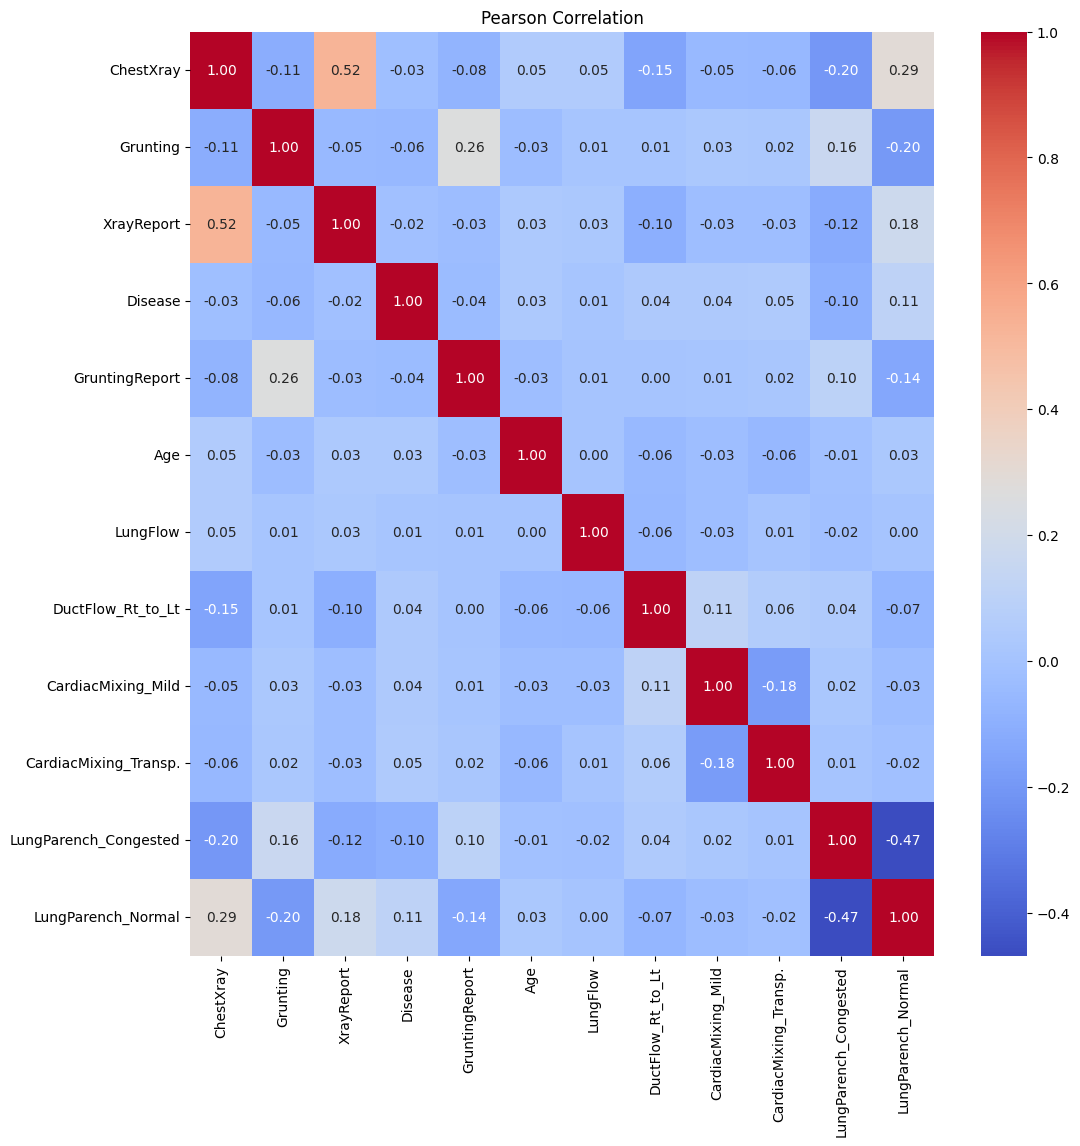

In [57]:
pearson_corr = x.corr(method='pearson')
plt.figure(figsize=(12,12))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation')
plt.show()

**Features on which Grunting depends on : (Top 5)**

    Mild   Cardiac Mixing

    Trans. Cardiac Mixing

    Congested Lung Parench

    Duct Flow Right to Left

    Lung Flow

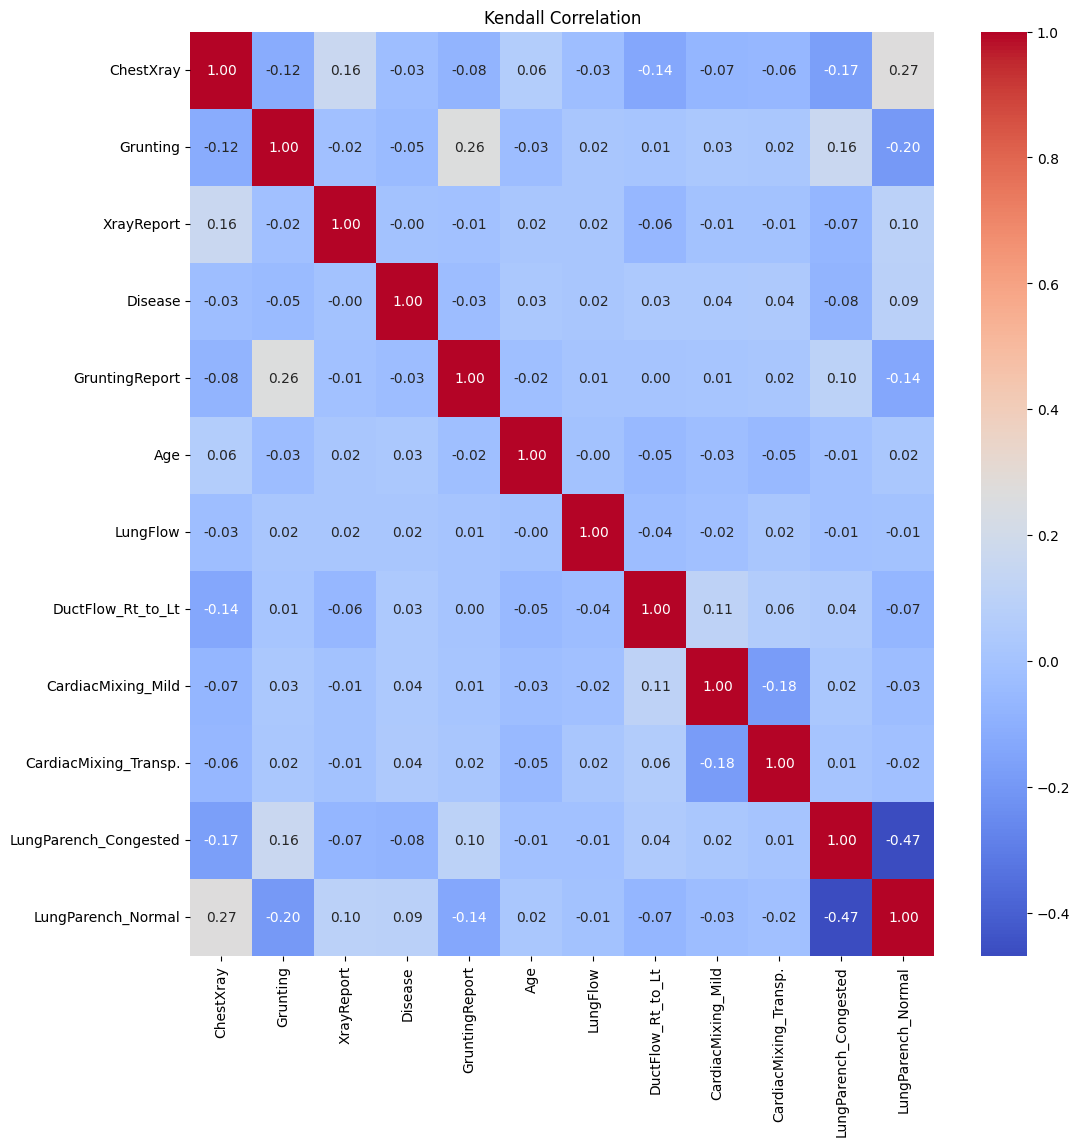

In [58]:
kendall_corr = x.corr(method='kendall')
plt.figure(figsize=(12,12))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Kendall Correlation')
plt.show()

**Features on which Grunting depends on : (Top 5)**

    Mild   Cardiac Mixing

    Trans. Cardiac Mixing

    Congested Lung Parench

    Duct Flow Right to Left

    Lung Flow


    

**OVERALL INSIGHTS**

THESE TOP 5 FEATURES ARE MOST CRITICAL IN ORDER TO INDENTIFY IF INFANT IS GRUNTING WHICH MAY LEAD TO A POSSIBILITY OF ANY OF THE 5 DISEASES MENTIONED ABOVE WHICH ARE 

    Mild   Cardiac Mixing

    Trans. Cardiac Mixing

    Congested Lung Parench

    Duct Flow Right to Left

    Lung Flow

<font size  = '6'>**Check the distribution(skewness) of the columns**</font>

Calculate the skewness of each column across rows and convert the results into a list for easier access.

In [59]:
list(x.skew(axis=0))  

[-1.6511346063479948,
 2.3187242032533506,
 -1.0202509598264728,
 -0.8907162000780083,
 1.8638622563136462,
 1.4713131794060024,
 -0.34194789921837015,
 3.270022292140786,
 3.4920227961114567,
 0.7590532888037582,
 4.212361805805771,
 -1.596125942399149]


The distribution of skewness values for the columns is as follows:

- Column 1: Skewness = -1.65
- Column 2: Skewness = 2.32
- Column 3: Skewness = -1.02
- Column 4: Skewness = -0.89
- Column 5: Skewness = 1.86
- Column 6: Skewness = 1.47
- Column 7: Skewness = -0.34
- Column 8: Skewness = 3.27
- Column 9: Skewness = 3.49
- Column 10: Skewness = 0.76
- Column 11: Skewness = 4.21
- Column 12: Skewness = -1.60

Skewness Direction:

- Negative skewness: Data skewed towards the left.
- Positive skewness: Data skewed towards the right.

Magnitude:

- Higher absolute values indicate more pronounced skewness.

Interpretation:

- A skewness of -1.65 in column 1 suggests moderate negative skewness, while 4.21 in column 11 indicates strong positive skewness, with data concentrated towards the left.

Based on the skewness results for each column:

1. The majority of columns (9 out of 12) exhibit moderate skewness, while the remaining columns (6 out of 12) are highly skewed. None of the columns are neutrally skewed.

2. All columns, except for the second one, are right-skewed. This implies that the mean of these columns is greater than the median. Such a distribution indicates that the majority of values fall below the median, but there exist outliers that pull the mean beyond the median.

3. The remaining two columns are left-skewed, meaning the mean of these columns is less than the median. This suggests that the majority of values in these columns are above the median, but outliers exist that pull the mean below the median.

To reduce skewness:

- For moderately skewed columns: Consider transforming using square-rooted or cubed transforms.
- For highly skewed columns: Consider transforming using a logarithmic transform.


<font size = '5'>**Detect Outliers(don't remove)**</font>

In [60]:
from scipy import stats

# Calculate Z-scores for each data point
z_scores = stats.zscore(x)

# Define a threshold for identifying outliers (e.g., Z-score > 3 or < -3)
threshold = 3

# Find outliers based on the Z-score
outliers = np.where(np.abs(z_scores) > threshold)

outliers

(array([    1,     1,     5, ..., 14994, 14994, 14999], dtype=int64),
 array([ 7,  8, 10, ...,  8, 10,  8], dtype=int64))

<font size = '5'>Detect Class Label Imbalance</font>

**Detect Class Label Imbalance**

In [61]:
# Get the count of non-null values in each column
column_counts = x.count()

# Sort the counts in descending order
column_counts_sorted = column_counts.sort_values(ascending=False)

column_counts_sorted

ChestXray                15000
Grunting                 15000
XrayReport               15000
Disease                  15000
GruntingReport           15000
Age                      15000
LungFlow                 15000
DuctFlow_Rt_to_Lt        15000
CardiacMixing_Mild       15000
CardiacMixing_Transp.    15000
LungParench_Congested    15000
LungParench_Normal       15000
dtype: int64